<a href="https://colab.research.google.com/github/Rakeshreddy7777/AI-heart-disease-predictor/blob/main/aipredictororiginalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rakesh7789","key":"45ec7afa63c7f61b65472a5fd5a6470c"}'}

In [42]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [43]:
!pip install kaggle

In [44]:
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci -p /content/sample_data --unzip


Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 9.92MB/s]


In [45]:
import pandas as pd
df = pd.read_csv('/content/sample_data/heart_cleveland_upload.csv')
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [47]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [48]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [49]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


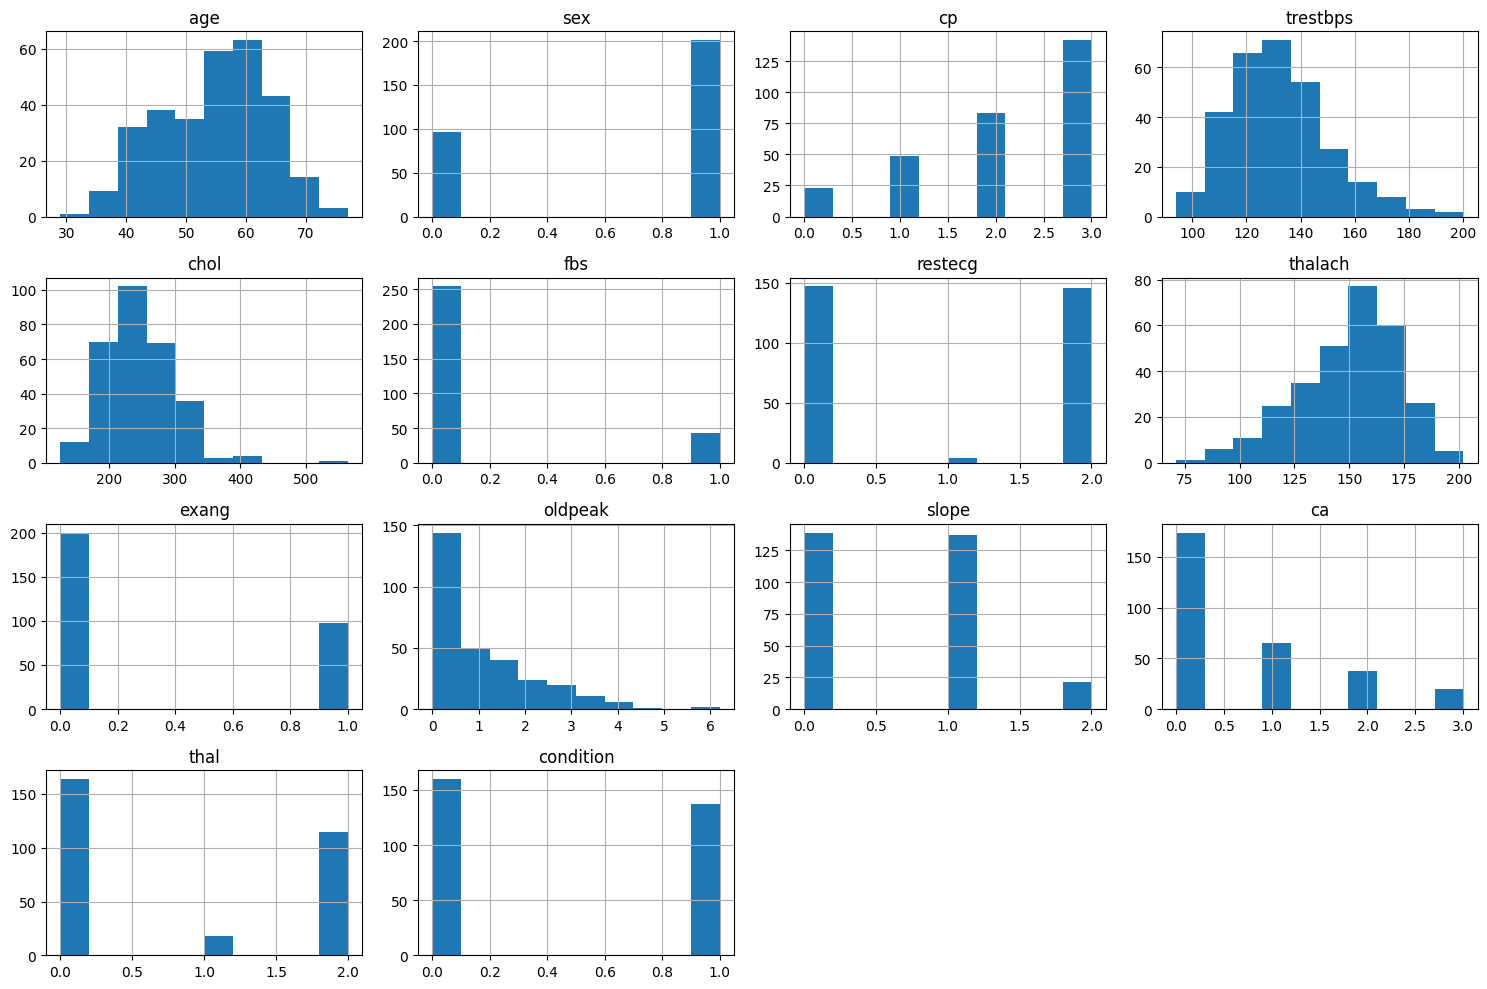

In [51]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

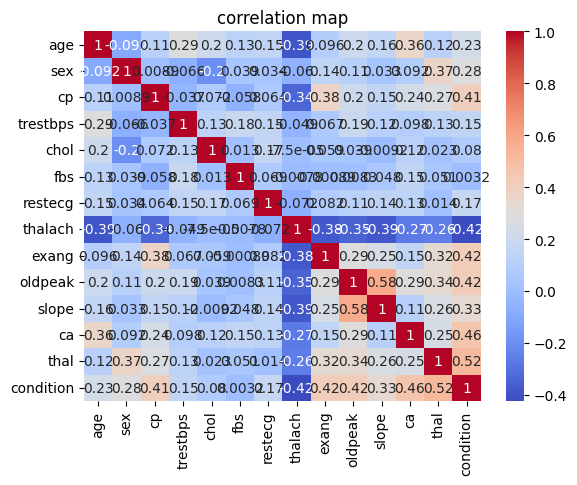

In [52]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('correlation map')
plt.show()

In [53]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if'condition' in cat_cols:
  cat_cols.remove('condition')

In [54]:
x = df.drop('condition',axis=1)
y = (df['condition'] > 0).astype(int)

In [55]:
x = pd.get_dummies(x,columns=cat_cols)
print("final feauture columns :",x.columns)


final feauture columns : Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
standard=StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

In [59]:
from sklearn.linear_model import LogisticRegression



In [60]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [61]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
y_pred_lr =lr_model.predict(x_test)
print("logistics regression accuracy:",accuracy_score(y_test,y_pred_lr))
print("classification report:\n",classification_report(y_test,y_pred_lr))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_lr))


logistics regression accuracy: 0.7333333333333333
classification report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

confusion matrix:
 [[23  9]
 [ 7 21]]


In [63]:
from sklearn.metrics import confusion_matrix

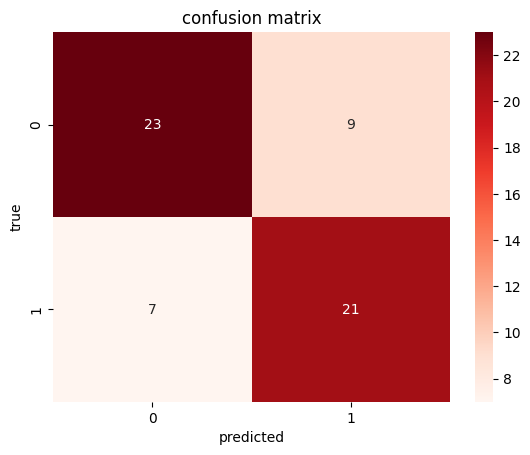

In [64]:
cm=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Reds')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print("random forest accuracy:",accuracy_score(y_test,y_pred_rf))
print("classification report:\n",classification_report(y_test,y_pred_rf))



random forest accuracy: 0.7
classification report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [67]:
print("random forest accuracy:", accuracy_score(y_test,y_pred_rf))

random forest accuracy: 0.7


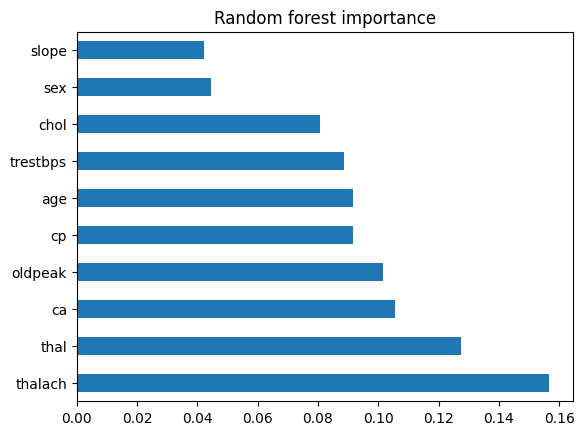

In [68]:
feat_imp =pd.Series(rf_model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random forest importance')
plt.show()

In [69]:
import joblib
joblib.dump(rf_model,'heart_disease_rf_model.pkl')
joblib.dump(standard,'heart disease_scaler.pkl')

['heart disease_scaler.pkl']

In [70]:
sample = x.head(1)
sample.to_csv('heart_user_template.csv',index=False)
print("User template saved as 'heart_user_template.csv' ")

User template saved as 'heart_user_template.csv' 


In [71]:
from google.colab import files
files.upload()


Saving heart_user_filled.csv to heart_user_filled (2).csv


{'heart_user_filled (2).csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal\n67,1,0,128,411,0,0,138,0,2.0,1,1,0\n57,0,3,158,456,0,0,103,1,1.0,1,2,0\n43,1,3,192,253,0,2,91,0,6.1,1,0,2\n71,0,3,194,473,1,1,118,1,5.2,0,1,3\n36,1,0,140,356,1,0,198,0,5.3,1,4,0\n49,0,0,171,315,0,2,198,0,1.6,1,1,2\n67,1,0,96,350,1,0,103,1,0.2,0,1,3\n47,0,2,94,510,1,0,185,1,1.9,2,1,1\n51,0,0,98,502,1,1,189,1,3.3,0,1,2\n39,1,0,183,408,1,2,92,0,2.0,1,2,3\n39,0,0,107,246,1,2,108,1,5.1,1,0,3\n52,1,2,196,241,0,1,179,0,1.7,0,3,2\n64,1,0,120,358,1,1,121,0,6.0,2,1,1\n68,1,3,102,384,0,2,78,0,2.8,1,4,2\n52,1,0,172,484,0,2,97,1,5.2,1,1,3\n31,1,3,108,323,1,1,97,1,1.2,1,4,0\n50,1,3,183,536,0,0,91,0,2.6,0,2,0\n30,1,3,135,262,0,0,100,0,4.3,1,4,2\n52,1,2,170,443,0,1,167,1,0.9,2,3,3\n72,1,2,144,290,1,0,98,0,0.8,1,0,0\n58,1,2,156,350,1,1,181,1,6.0,1,4,3\n66,1,0,189,432,0,0,131,0,4.4,2,4,2\n30,0,3,196,359,1,0,118,1,0.3,1,0,0\n49,0,2,145,297,1,2,74,0,2.5,0,3,3\n61,1,2,189,277,1,2,105,1,2.7,0,1,0\n40,1,

In [72]:
import joblib
import pandas as pd
user_df=pd.read_csv('heart_user_filled.csv')

numeric_cols = user_df.select_dtypes(include=['number']).columns.tolist()
cat_cols = user_df.select_dtypes(include=['object']).columns.tolist()
bool_cols = user_df.select_dtypes(include=['bool']).columns.tolist()

numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col] = user_df[col].fillna('Unknown')
for col in bool_cols:
  user_df[col]=user_df[col].astype(int)

user_df_encoded=pd.get_dummies(user_df,columns=cat_cols)

user_df_encoded = user_df_encoded.reindex(columns=x.columns,fill_value=0)

model=joblib.load('heart_disease_rf_model.pkl')
preds=model.predict(user_df_encoded.values) # remove feature names here
user_df['prediction']=preds
print(user_df)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    67    1   0       128   411    0        0      138      0      2.0   
1    57    0   3       158   456    0        0      103      1      1.0   
2    43    1   3       192   253    0        2       91      0      6.1   
3    71    0   3       194   473    1        1      118      1      5.2   
4    36    1   0       140   356    1        0      198      0      5.3   
5    49    0   0       171   315    0        2      198      0      1.6   
6    67    1   0        96   350    1        0      103      1      0.2   
7    47    0   2        94   510    1        0      185      1      1.9   
8    51    0   0        98   502    1        1      189      1      3.3   
9    39    1   0       183   408    1        2       92      0      2.0   
10   39    0   0       107   246    1        2      108      1      5.1   
11   52    1   2       196   241    0        1      179      0      1.7   
12   64    1   0       12

In [73]:
display(user_df_encoded.describe())
display(x.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,51.140000,0.680000,1.560000,145.800000,345.980000,0.520000,0.920000,131.380000,0.540000,2.700000,0.900000,1.800000,1.480000
std,13.278815,0.471212,1.231558,32.828559,105.421891,0.504672,0.829064,39.662294,0.503457,1.855824,0.788954,1.511858,1.129204
min,30.000000,0.000000,0.000000,94.000000,127.000000,0.000000,0.000000,74.000000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,40.500000,0.000000,0.000000,121.000000,253.500000,0.000000,0.000000,97.250000,0.000000,1.025000,0.000000,0.000000,0.000000
50%,50.500000,1.000000,2.000000,142.000000,349.500000,1.000000,1.000000,118.500000,1.000000,2.550000,1.000000,2.000000,2.000000
75%,63.250000,1.000000,3.000000,175.750000,438.000000,1.000000,2.000000,169.000000,1.000000,4.300000,1.750000,3.000000,2.000000
max,75.000000,1.000000,3.000000,196.000000,536.000000,1.000000,2.000000,198.000000,1.000000,6.100000,2.000000,4.000000,3.000000


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000


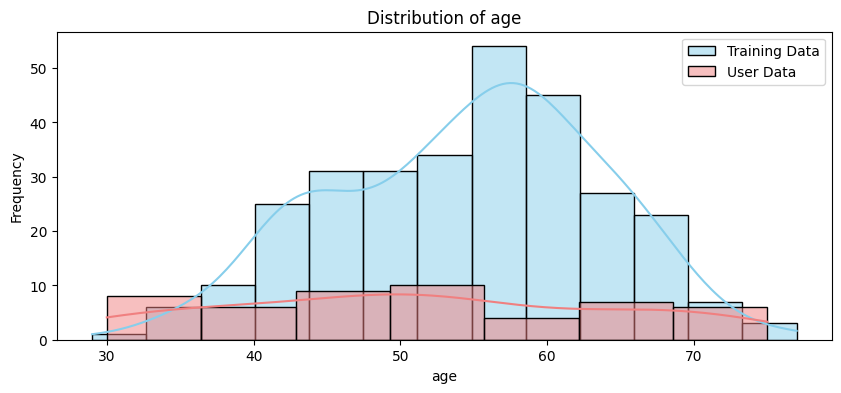

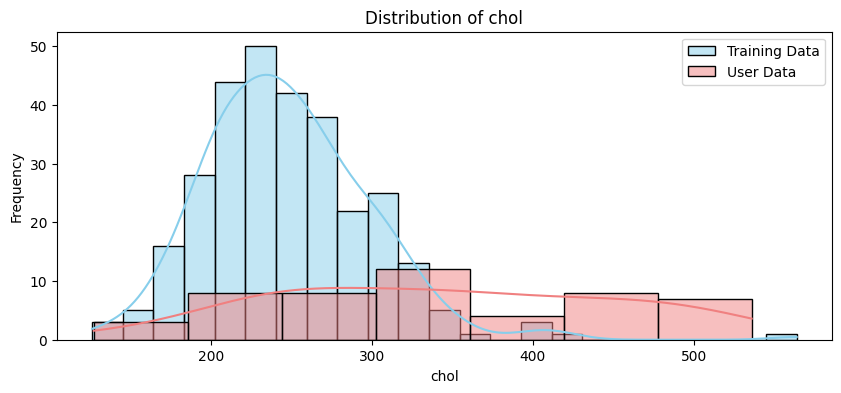

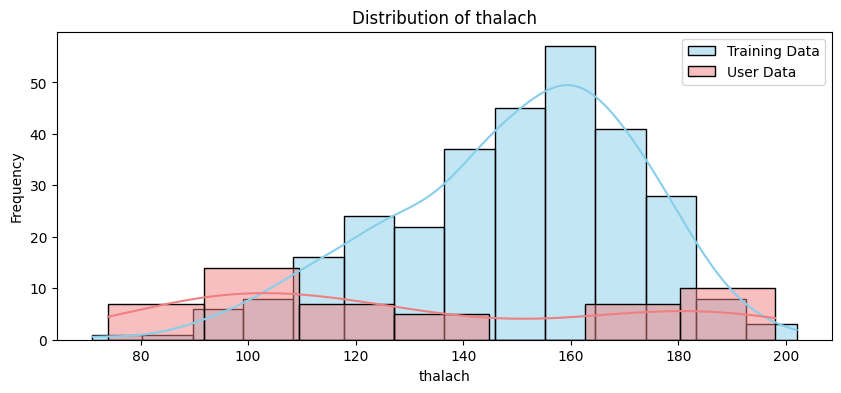

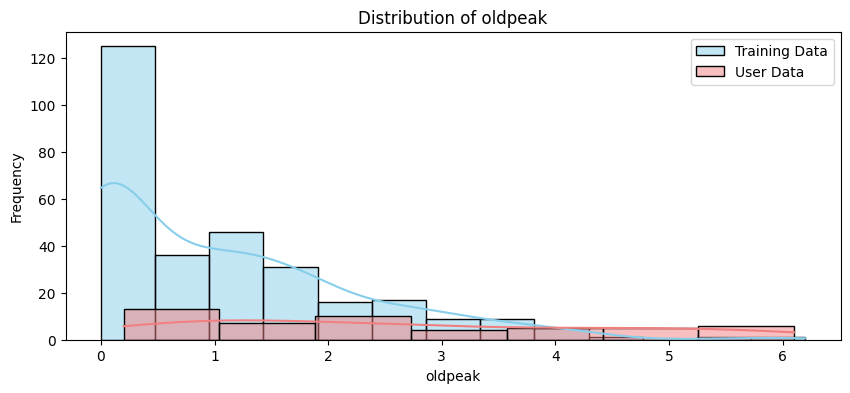

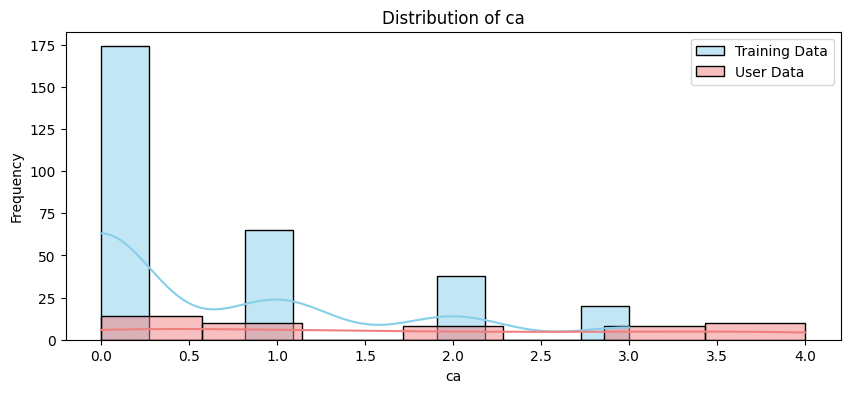

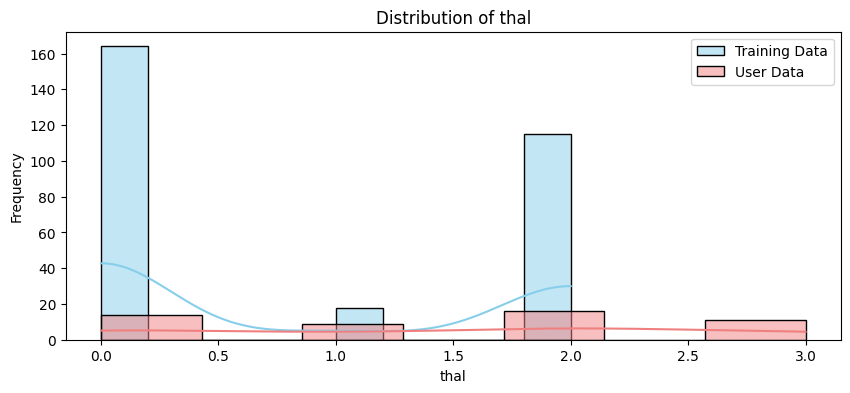

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select some key features to visualize
key_features = ['age', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

for feature in key_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(x[feature], kde=True, color='skyblue', label='Training Data')
    sns.histplot(user_df_encoded[feature], kde=True, color='lightcoral', label='User Data')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [75]:
combined_df = pd.concat([df, user_df], ignore_index=True)
display(combined_df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,prediction
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0.0,NaN
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0.0,NaN
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0.0,NaN
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1.0,NaN
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0.0,NaN


In [76]:
numeric_cols = combined_df.select_dtypes(include=['number']).columns.tolist()
cat_cols = combined_df.select_dtypes(include=['object']).columns.tolist()
bool_cols = combined_df.select_dtypes(include=['bool']).columns.tolist()

if 'condition' in numeric_cols:
  numeric_cols.remove('condition')

combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].mean())

for col in cat_cols:
  combined_df[col] = combined_df[col].fillna('Unknown')

for col in bool_cols:
  combined_df[col] = combined_df[col].astype(int)

combined_df_encoded = pd.get_dummies(combined_df, columns=cat_cols)


if 'prediction' in combined_df_encoded.columns:
    combined_df_encoded = combined_df_encoded.drop('prediction', axis=1)


combined_df_encoded = combined_df_encoded.reindex(columns=x.columns, fill_value=0)

x_combined = combined_df_encoded
y_combined = combined_df['condition']

x_combined_scaled = standard.transform(x_combined)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

nan_indices = y_combined[y_combined.isna()].index
x_combined_scaled = np.delete(x_combined_scaled, nan_indices, axis=0)
y_combined = y_combined.drop(nan_indices)

x_train_combined, x_test_combined, y_train_combined, y_test_combined = train_test_split(x_combined_scaled, y_combined, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_combined, y_train_combined)

RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.7
 Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.69      0.71        32
         1.0       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

Confusion Matrix:
 [[22 10]
 [ 8 20]]


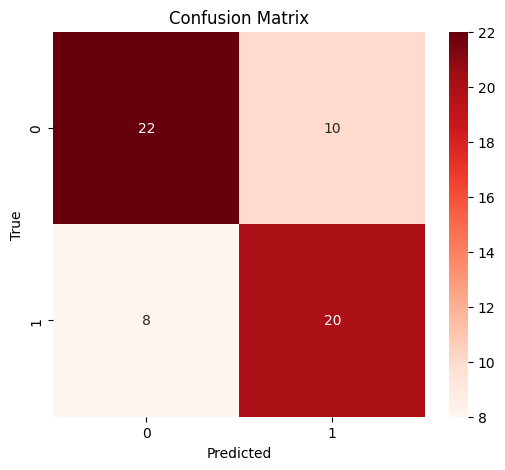

In [78]:
y_pred_combined = rf_model.predict(x_test_combined)
print("Random Forest Accuracy:", accuracy_score(y_test_combined, y_pred_combined))
print(" Classification Report:\n", classification_report(y_test_combined, y_pred_combined))
cm= confusion_matrix(y_test_combined, y_pred_combined)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [79]:
user_df_original = pd.read_csv('heart_user_filled.csv')

numeric_cols_user = user_df_original.select_dtypes(include=['number']).columns.tolist()
cat_cols_user = user_df_original.select_dtypes(include=['object']).columns.tolist()
bool_cols_user = user_df_original.select_dtypes(include=['bool']).columns.tolist()


user_df_original[numeric_cols_user] = user_df_original[numeric_cols_user].fillna(user_df_original[numeric_cols_user].mean())

for col in cat_cols_user:
  user_df_original[col] = user_df_original[col].fillna('Unknown')

for col in bool_cols_user:
  user_df_original[col] = user_df_original[col].astype(int)

user_df_original_encoded = pd.get_dummies(user_df_original, columns=cat_cols_user)


user_df_original_encoded = user_df_original_encoded.reindex(columns=x.columns, fill_value=0)

user_df_original_scaled = standard.transform(user_df_original_encoded)

preds= rf_model.predict(user_df_original_scaled)

user_df_original['prediction'] = preds


display(user_df_original)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,prediction
0,67,1,0,128,411,0,0,138,0,2.0,1,1,0,1.0
1,57,0,3,158,456,0,0,103,1,1.0,1,2,0,1.0
2,43,1,3,192,253,0,2,91,0,6.1,1,0,2,1.0
3,71,0,3,194,473,1,1,118,1,5.2,0,1,3,1.0
4,36,1,0,140,356,1,0,198,0,5.3,1,4,0,0.0
5,49,0,0,171,315,0,2,198,0,1.6,1,1,2,0.0
6,67,1,0,96,350,1,0,103,1,0.2,0,1,3,0.0
7,47,0,2,94,510,1,0,185,1,1.9,2,1,1,0.0
8,51,0,0,98,502,1,1,189,1,3.3,0,1,2,0.0
9,39,1,0,183,408,1,2,92,0,2.0,1,2,3,1.0
